In [28]:
!pip install pycaret[full] --quiet

In [29]:
# check installed version
import pycaret
import pandas as pd
from pycaret.time_series import TSForecastingExperiment
pycaret.__version__
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
### loading sample dataset from pycaret dataset module

data_path = '/content/drive/My Drive/pycaret_timeseries/SolarPrediction.csv'
data = pd.read_csv(data_path)
data.head()


,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [31]:
# Step 4: Preprocess the dataset
data.columns = data.columns.str.strip()
print(data.head())
# Now check again if the names match
# print(df.columns)





     UNIXTime                   Data      Time  Radiation  Temperature  \
0  1475229326  9/29/2016 12:00:00 AM  23:55:26       1.21           48   
1  1475229023  9/29/2016 12:00:00 AM  23:50:23       1.21           48   
2  1475228726  9/29/2016 12:00:00 AM  23:45:26       1.23           48   
3  1475228421  9/29/2016 12:00:00 AM  23:40:21       1.21           48   
4  1475228124  9/29/2016 12:00:00 AM  23:35:24       1.17           48   

   Pressure  Humidity  WindDirection(Degrees)  Speed TimeSunRise TimeSunSet  
0     30.46        59                  177.39   5.62    06:13:00   18:13:00  
1     30.46        58                  176.78   3.37    06:13:00   18:13:00  
2     30.46        57                  158.75   3.37    06:13:00   18:13:00  
3     30.46        60                  137.71   3.37    06:13:00   18:13:00  
4     30.46        62                  104.95   5.62    06:13:00   18:13:00  


In [32]:
# Combine 'Date' and 'Time' columns into a new 'DateTime' column
data['DateTime'] = pd.to_datetime(data['Data'] + ' ' + data['Time'])

# Set 'Datetime' as the index

data.set_index('DateTime', inplace=True)

# Assign a frequency to the DateTime index (e.g., 'H' for hourly, 'D' for daily)
data = data.asfreq('H')
#df.set_index('DateTime', inplace=True)
data.drop(['UNIXTime', 'Data', 'Time', 'TimeSunRise', 'TimeSunSet'], axis=1, inplace=True)
target = "Radiation"

print(data.head())


                     Radiation  Temperature  Pressure  Humidity  \
DateTime                                                          
2016-09-01 00:00:08       2.58         51.0     30.43     103.0   
2016-09-01 01:00:08        NaN          NaN       NaN       NaN   
2016-09-01 02:00:08        NaN          NaN       NaN       NaN   
2016-09-01 03:00:08        NaN          NaN       NaN       NaN   
2016-09-01 04:00:08        NaN          NaN       NaN       NaN   

                     WindDirection(Degrees)  Speed  
DateTime                                            
2016-09-01 00:00:08                   77.27  11.25  
2016-09-01 01:00:08                     NaN    NaN  
2016-09-01 02:00:08                     NaN    NaN  
2016-09-01 03:00:08                     NaN    NaN  
2016-09-01 04:00:08                     NaN    NaN  


In [33]:
data.head()
# Global Figure Settings for notebook ----
# Depending on whether you are using jupyter notebook, jupyter lab, Google Colab, you may have to set the renderer appropriately
# NOTE: Setting to a static renderer here so that the notebook saved size is reduced.
global_fig_settings = {
    # "renderer": "notebook",
    "renderer": "png",
    "width": 1000,
    "height": 600,
}

In [34]:
# Create an EDA experiment ----
eda = TSForecastingExperiment()
eda.setup(data=data,target=target,fh=48,numeric_imputation_target="ffill",numeric_imputation_exogenous="ffill",fig_kwargs=global_fig_settings,session_id=42)

,Description,Value
0,session_id,42
1,Target,Radiation
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(2928, 6)"
5,Transformed data shape,"(2928, 6)"
6,Transformed train set shape,"(2880, 6)"
7,Transformed test set shape,"(48, 6)"
8,Rows with missing values,99.0%
9,Fold Generator,ExpandingWindowSplitter


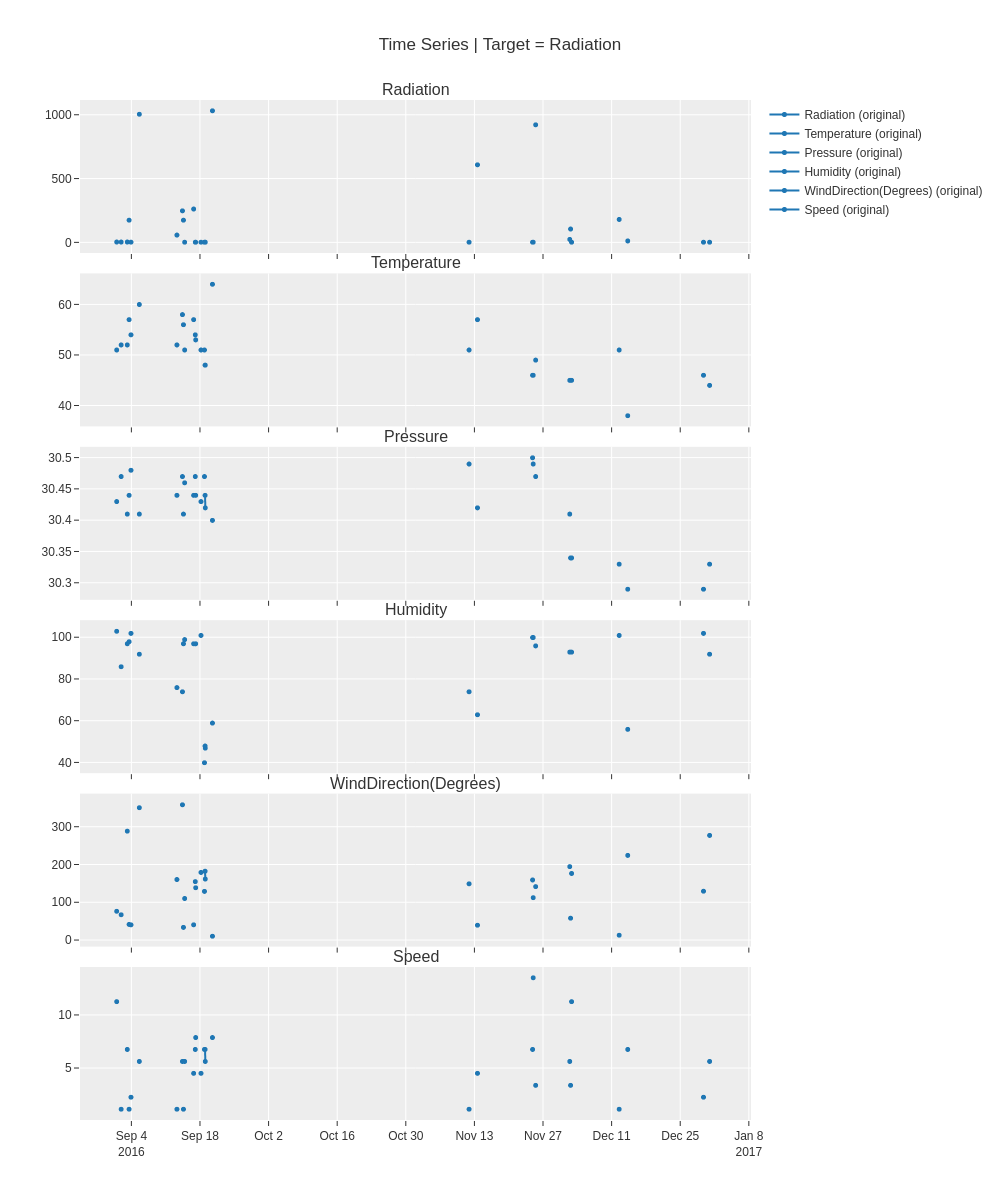

In [35]:
eda.plot_model(fig_kwargs={"renderer": "png", "width": 1000, "height": 1200})

In [36]:
eda.compare_models()

Processing:   0%|          | 0/89 [00:00<?, ?it/s]

[]

In [37]:
# plot forecast
from pycaret.time_series import *
plot_model(best, plot = 'forecast')

NameError: name 'plot_model' is not defined

In [ ]:
# residuals plot
plot_model(best, plot = 'residuals')

In [ ]:
# predict on test set
holdout_pred = predict_model(best)

In [ ]:
#show predictions df
holdout_pred.head()

In [ ]:
# generate forecast for 36 period in future
predict_model(best, fh = 36)

In [ ]:
# save pipeline
save_model(best, 'my_first_pipeline')

In [ ]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline